<a href="https://colab.research.google.com/github/moshebou/ML-Bootcamp/blob/master/IntrotoVariationalAutoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Variational Autoencoders


The idea of Variational Autoencoder (Kingma & Welling, 2014), short for VAE, is  deeply rooted in the methods of variational bayesian and graphical model.

Instead of mapping the input into a fixed vector, we want to map it into a distribution. \
Let’s label this distribution as pθ, parameterized by θ. \
The relationship between the data input x and the latent encoding vector z can be fully defined by:

* Prior $p_θ(z)$ \
* Likelihood $p_θ(x|z)$ \
* Posterior $p_θ(z|x)$ \

Assuming that we know the real parameter $θ^*$ for this distribution. In order to generate a sample that looks like a real data point $x^{(i)}$, we follow these steps:

1. First, sample a $z^{(i)}$ from a prior distribution $p_{θ^∗}(z)$.
2. Then a value $x^{(i)}$ is generated from a conditional distribution $p_{θ^∗}(x|z=z(i))$.

The optimal parameter $θ^∗$ is the one that maximizes the probability of generating real data samples:

$$θ^∗=\underset{\theta}{argmax}\underset{i=1}{\overset{n} {\Pi}}p_θ(x^{(i)})$$
Commonly we use the log probabilities to convert the product on RHS to a sum:

$$θ^∗=\underset{\theta}{argmax}\underset{i=1}{\overset{n} {\sum}}\log p_θ(x^{(i)})$$
Now let’s update the equation to better demonstrate the data generation process so as to involve the encoding vector:

$p_\theta(x^{(i)})=∫p_\theta(x^{(i)}|z)p_\theta(z)dz$

Unfortunately it is not easy to compute $p_θ(x^{(i)})$ in this way, as it is very expensive to check all the possible values of $z$ and sum them up. To narrow down the value space to facilitate faster search, we would like to introduce a new approximation function to output what is a likely code given an input $x$, $q_ϕ(z|x)$, parameterized by $ϕ$.

Distributions in VAE

The graphical model involved in Variational Autoencoder. Solid lines denote the generative distribution pθ(.) and dashed lines denote the distribution qϕ(z|x) to approximate the intractable posterior pθ(z|x).

![The graphical model involved in Variational Autoencoder. Solid lines denote the generative distribution pθ(.) and dashed lines denote the distribution qϕ(z|x) to approximate the intractable posterior pθ(z|x).](https://lilianweng.github.io/lil-log/assets/images/VAE-graphical-model.png)

Now the structure looks a lot like an autoencoder:

The conditional probability pθ(x|z) defines a generative model, similar to the decoder fθ(x|z) introduced above. pθ(x|z) is also known as probabilistic decoder.
The approximation function qϕ(z|x) is the probabilistic encoder, playing a similar role as gϕ(z|x) above.

## VAE Loss
$$
\begin{aligned}
& D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}\vert\mathbf{x}) ) & \\
&=\int q_\phi(\mathbf{z} \vert \mathbf{x}) \log\frac{q_\phi(\mathbf{z} \vert \mathbf{x})}{p_\theta(\mathbf{z} \vert \mathbf{x})} d\mathbf{z} & \\
&=\int q_\phi(\mathbf{z} \vert \mathbf{x}) \log\frac{q_\phi(\mathbf{z} \vert \mathbf{x})p_\theta(\mathbf{x})}{p_\theta(\mathbf{z}, \mathbf{x})} d\mathbf{z} & \scriptstyle{\text{; Because }p(z \vert x) = p(z, x) / p(x)} \\
&=\int q_\phi(\mathbf{z} \vert \mathbf{x}) \big( \log p_\theta(\mathbf{x}) + \log\frac{q_\phi(\mathbf{z} \vert \mathbf{x})}{p_\theta(\mathbf{z}, \mathbf{x})} \big) d\mathbf{z} & \\
&=\log p_\theta(\mathbf{x}) + \int q_\phi(\mathbf{z} \vert \mathbf{x})\log\frac{q_\phi(\mathbf{z} \vert \mathbf{x})}{p_\theta(\mathbf{z}, \mathbf{x})} d\mathbf{z} & \scriptstyle{\text{; Because }\int q(z \vert x) dz = 1}\\
&=\log p_\theta(\mathbf{x}) + \int q_\phi(\mathbf{z} \vert \mathbf{x})\log\frac{q_\phi(\mathbf{z} \vert \mathbf{x})}{p_\theta(\mathbf{x}\vert\mathbf{z})p_\theta(\mathbf{z})} d\mathbf{z} & \scriptstyle{\text{; Because }p(z, x) = p(x \vert z) p(z)} \\
&=\log p_\theta(\mathbf{x}) + \mathbb{E}_{\mathbf{z}\sim q_\phi(\mathbf{z} \vert \mathbf{x})}[\log \frac{q_\phi(\mathbf{z} \vert \mathbf{x})}{p_\theta(\mathbf{z})} - \log p_\theta(\mathbf{x} \vert \mathbf{z})] &\\
&=\log p_\theta(\mathbf{x}) + D_\text{KL}(q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z})) - \mathbb{E}_{\mathbf{z}\sim q_\phi(\mathbf{z}\vert\mathbf{x})}\log p_\theta(\mathbf{x}\vert\mathbf{z}) &
\end{aligned}
$$

So we have:

$$
D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}\vert\mathbf{x}) ) =\log p_\theta(\mathbf{x}) + D_\text{KL}(q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z})) - \mathbb{E}_{\mathbf{z}\sim q_\phi(\mathbf{z}\vert\mathbf{x})}\log p_\theta(\mathbf{x}\vert\mathbf{z})
$$


Once rearrange the left and right hand side of the equation,

$$
\log p_\theta(\mathbf{x}) - D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}\vert\mathbf{x}) ) = \mathbb{E}_{\mathbf{z}\sim q_\phi(\mathbf{z}\vert\mathbf{x})}\log p_\theta(\mathbf{x}\vert\mathbf{z}) - D_\text{KL}(q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}))
$$

The LHS of the equation is exactly what we want to maximize when learning the true distributions: we want to maximize the (log-)likelihood of generating real data (that is logpθ(x)) and also minimize the difference between the real and estimated posterior distributions (the term DKL works like a regularizer). Note that pθ(x) is fixed with respect to qϕ.

The negation of the above defines our loss function:
$$
% <![CDATA[
\begin{aligned}
L_\text{VAE}(\theta, \phi) 
&= -\log p_\theta(\mathbf{x}) + D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}\vert\mathbf{x}) )\\
&= - \mathbb{E}_{\mathbf{z} \sim q_\phi(\mathbf{z}\vert\mathbf{x})} \log p_\theta(\mathbf{x}\vert\mathbf{z}) + D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}) ) \\
\theta^{*}, \phi^{*} &= \arg\min_{\theta, \phi} L_\text{VAE}
\end{aligned} %]]>
$$


In Variational Bayesian methods, this loss function is known as the variational lower bound, or evidence lower bound. The “lower bound” part in the name comes from the fact that KL divergence is always non-negative and thus −LVAE is the lower bound of $log(p_θ(x))$.

$$
-L_\text{VAE} = \log p_\theta(\mathbf{x}) - D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}\vert\mathbf{x}) ) \leq \log p_\theta(\mathbf{x})
$$

Therefore by minimizing the loss, we are maximizing the lower bound of the probability of generating real data samples.

## Reparameterization Trick
The expectation term in the loss function invokes generating samples from z∼qϕ(z|x). Sampling is a stochastic process and therefore we cannot backpropagate the gradient. To make it trainable, the reparameterization trick is introduced: It is often possible to express the random variable z as a deterministic variable $z=T_ϕ(x,ϵ)$, where ϵ is an auxiliary independent random variable, and the transformation function Tϕ parameterized by ϕ converts ϵ to z.

For example, a common choice of the form of $q_ϕ(z|x)$ is a multivariate Gaussian with a diagonal covariance structure:

$$z∼q_ϕ(z|x(i))=N(z;μ(i), σ2(i)I)=μ+σ⊙ϵ$$

where $ϵ∼N(0,I)$; Reparameterization trick.
where ⊙ refers to element-wise product.

Reparameterization trick

Fig. 8. Illustration of how the reparameterization trick makes the z sampling process trainable.(Image source: Slide 12 in Kingma’s NIPS 2015 workshop talk)
![](https://lilianweng.github.io/lil-log/assets/images/reparameterization-trick.png)

The reparameterization trick works for other types of distributions too, not only Gaussian. In the multivariate Gaussian case, we make the model trainable by learning the mean and variance of the distribution, μ and σ, explicitly using the reparameterization trick, while the stochasticity remains in the random variable ϵ∼N(0,I).

Gaussian VAE

Fig. 9. Illustration of variational autoencoder model with the multivariate Gaussian assumption.
![](https://lilianweng.github.io/lil-log/assets/images/vae-gaussian.png)

## Code example

In [1]:
# general imports
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# dataset handline
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(
  root="~/torch_datasets", train=True, transform=transform, download=True
)
test_dataset = torchvision.datasets.MNIST(
  root="~/torch_datasets", train=False, transform=transform, download=True
)
train_loader = torch.utils.data.DataLoader(
  train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)
test_loader = torch.utils.data.DataLoader(
  test_dataset, batch_size=32, shuffle=False, num_workers=4
)

Extracting /root/torch_datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/torch_datasets/MNIST/raw


Extracting /root/torch_datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/torch_datasets/MNIST/raw


Extracting /root/torch_datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/torch_datasets/MNIST/raw


Extracting /root/torch_datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/torch_datasets/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [6]:
class Reshape(nn.Module):
  def __init__(self, channels, width, height=None):
    self.width = width
    if height is not None:
      self.height = height
    else:
      self.height = width
    self.channels = channels
    super(Reshape, self).__init__()

  def forward(self, input):
    return torch.reshape(input, (input.shape[0], self.channels, self.width, self.height))


class reparameterize(nn.Module):
  def __init__(self):
    super(Reshape, self).__init__()

  def forward(self, mu, logvar):
    std = torch.exp(0.5*logvar)
    eps = torch.randn_like(std)
    return mu + eps*std

class Flatten(nn.Module):
  def forward(self, input):
    return input.view(input.shape[0], -1)
# simplest nn - conv transpose
class AE_model(nn.Module):
  def __init__(self):
    super(AE_model, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(1, 64, 3, stride=2, padding=1, dilation=1, groups=1, bias=True, padding_mode='zeros'),
      nn.LeakyReLU(0.3),
      nn.Conv2d(64, 128, 4, stride=2, padding=1, dilation=1, groups=1, bias=True, padding_mode='zeros'),
      nn.LeakyReLU(0.3),
      Flatten()
    )
    self.mu = nn.Sequential(
      nn.Linear(128*7*7, 64),
      nn.Tanh()
    )
    self.logvar = nn.Sequential(
      nn.Linear(128*7*7, 64),
      nn.Tanh()
    )

    self.decoder = nn.Sequential(
      nn.Linear(64, 128*7*7),
      Reshape(128, 7, 7),
      nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, dilation=1, groups=1, bias=True, padding_mode='zeros'),
      nn.LeakyReLU(0.3),
      nn.ConvTranspose2d(64, 1, 4, stride=2, padding=1, dilation=1, groups=1, bias=True, padding_mode='zeros'),
      nn.Sigmoid()
    )


  def forward(self, x):
    z = self.encoder(x)
    mu = self.mu(z)
    logvar = self.logvar(z)
    std = torch.exp(0.5*logvar)
    eps = torch.randn_like(std)
    z_ = mu + eps*std
    return self.decoder(z_), mu, logvar

In [11]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
  BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')

  # see Appendix B from VAE paper:
  # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
  # https://arxiv.org/abs/1312.6114
  # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
  KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
  return BCE + KLD

start epoch 0


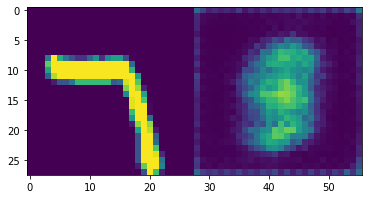

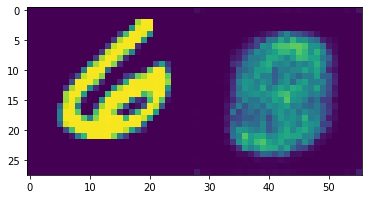

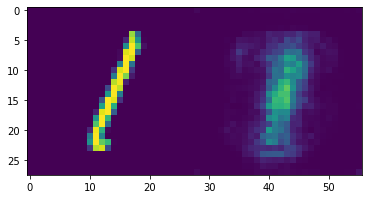

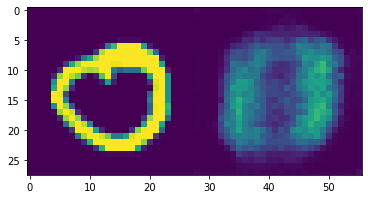

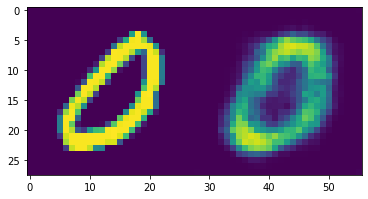

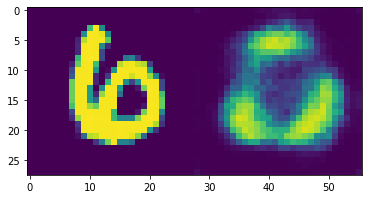

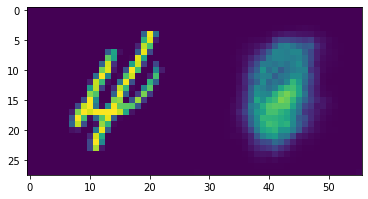

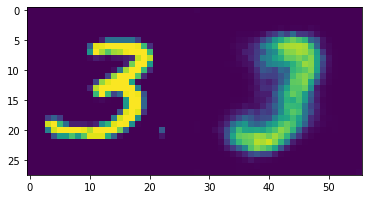

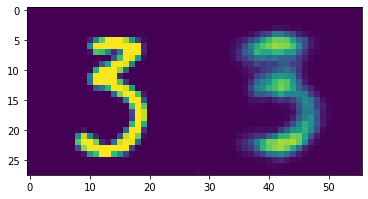

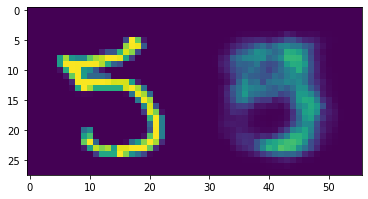

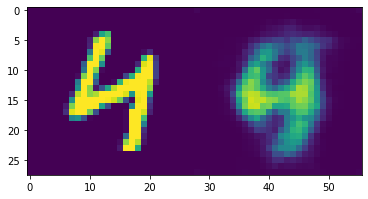

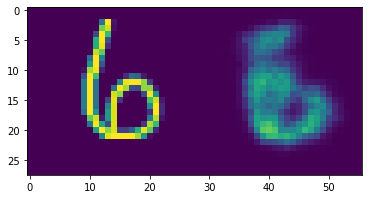

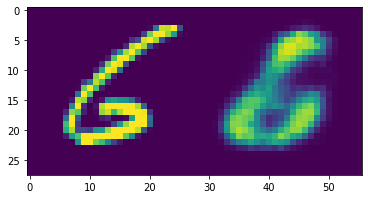

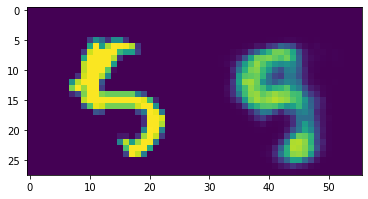

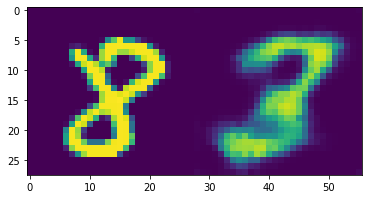

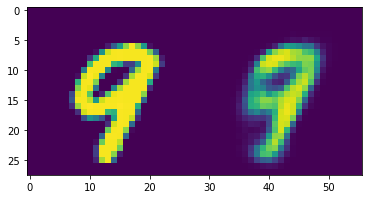

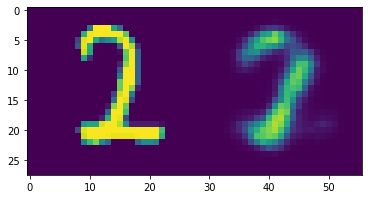

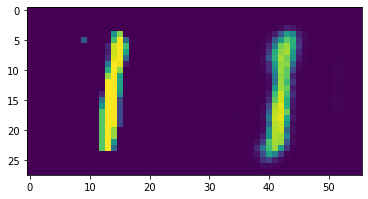

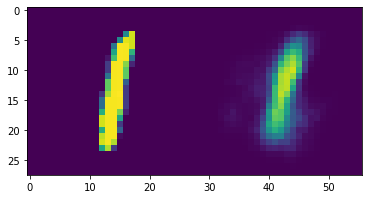

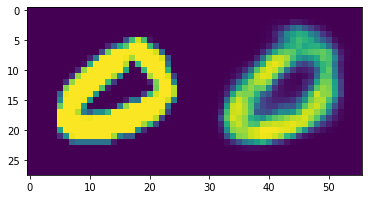

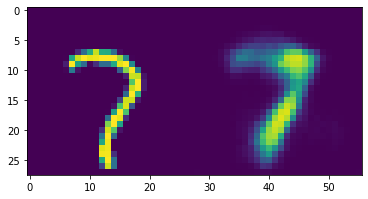

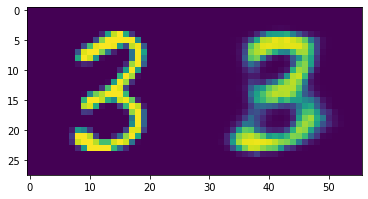

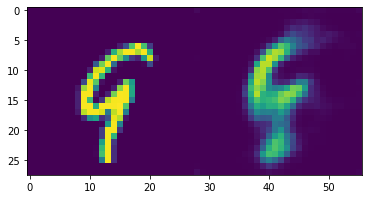

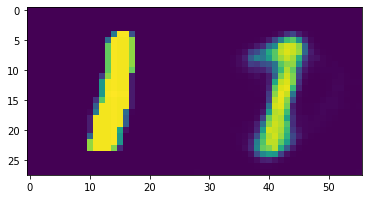

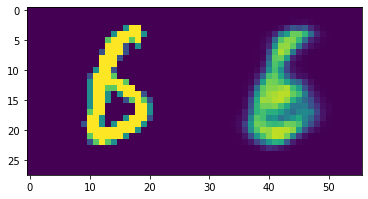

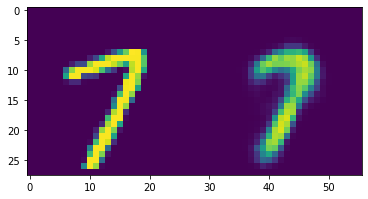

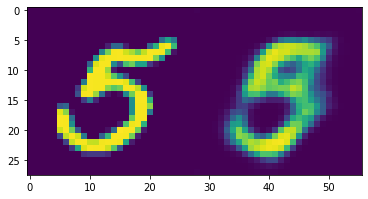

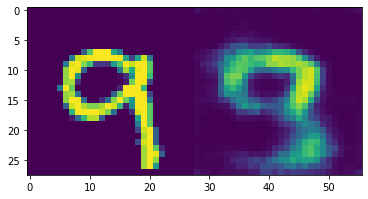

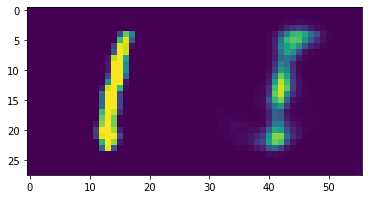

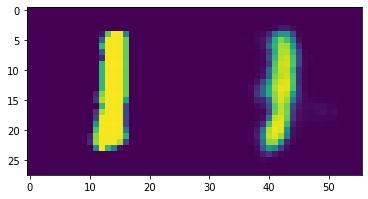

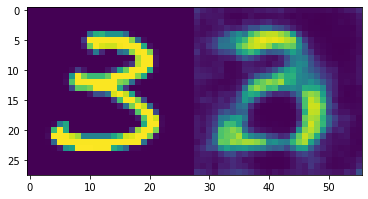

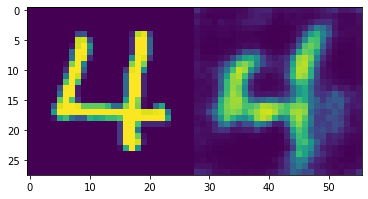

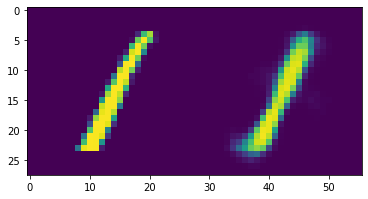

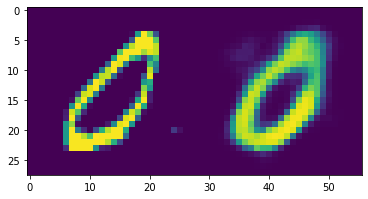

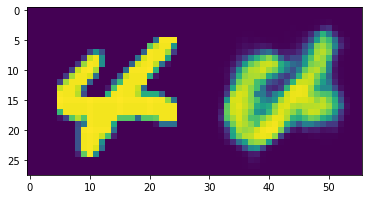

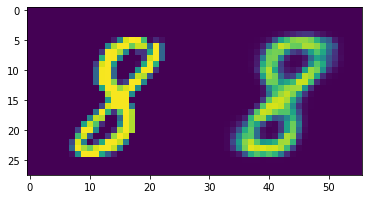

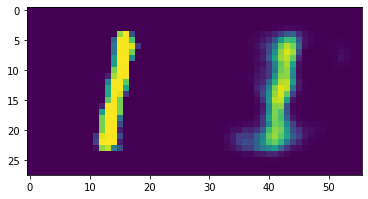

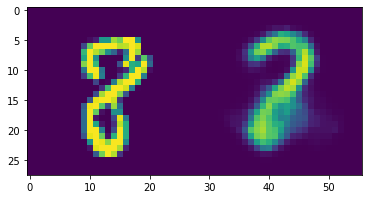

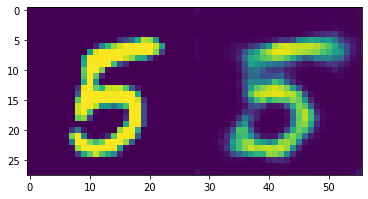

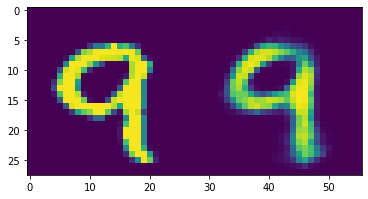

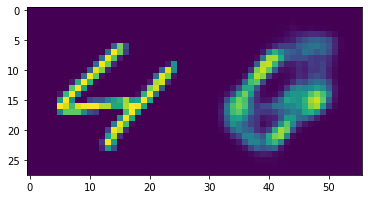

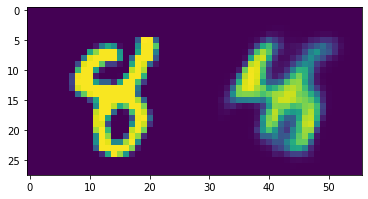

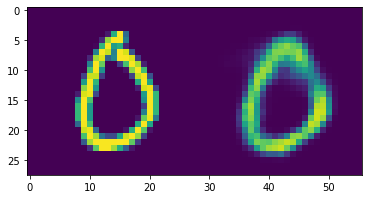

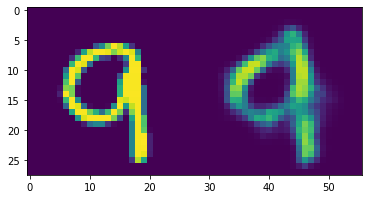

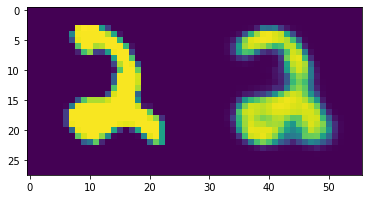

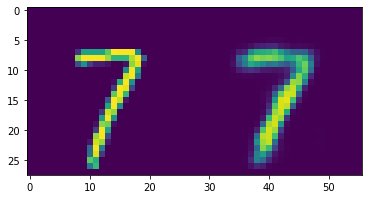

epoch : 1/3, loss = 21286.086716
start epoch 1


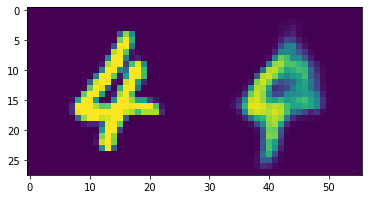

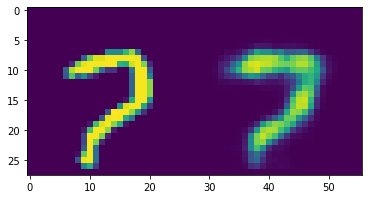

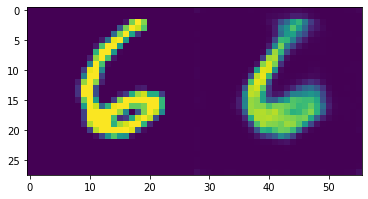

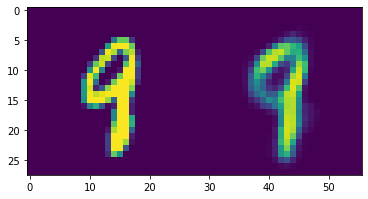

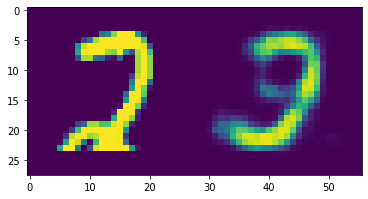

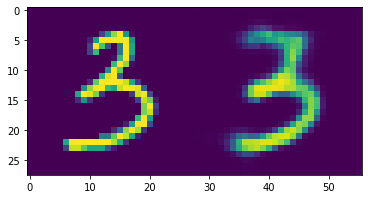

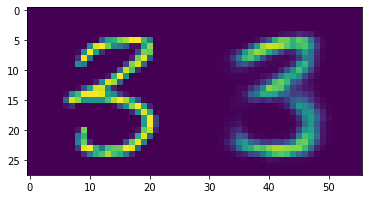

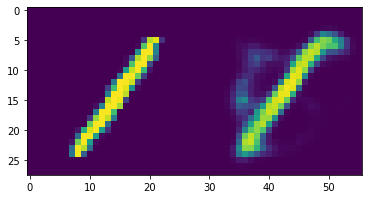

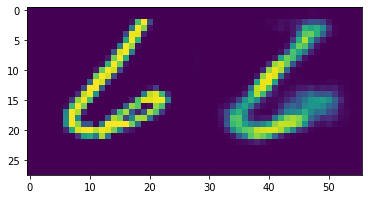

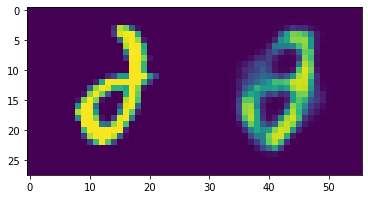

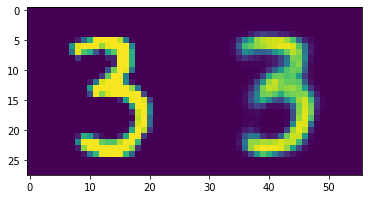

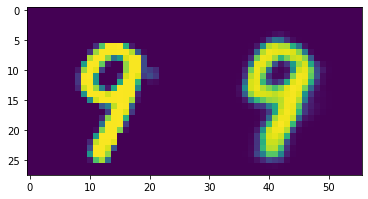

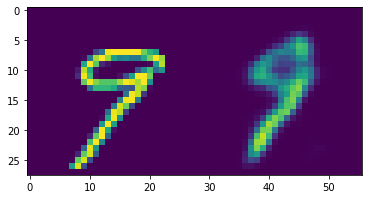

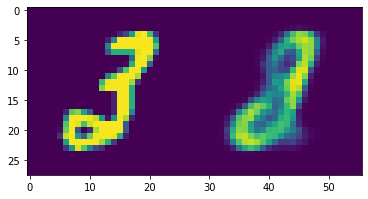

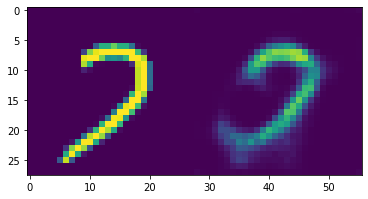

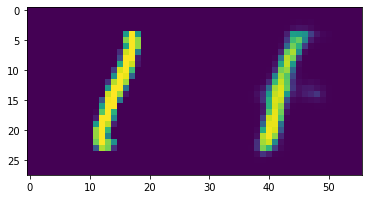

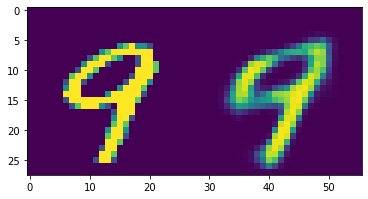

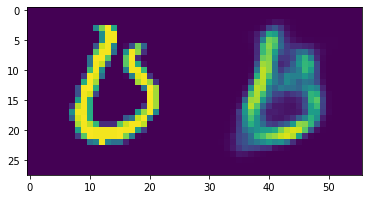

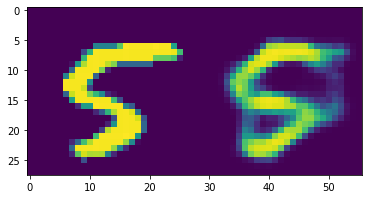

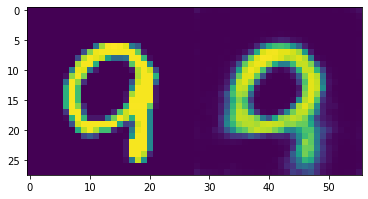

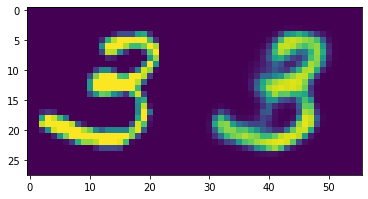

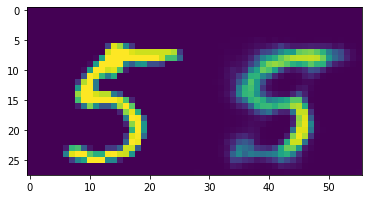

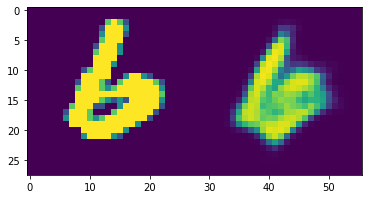

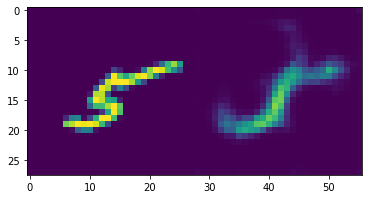

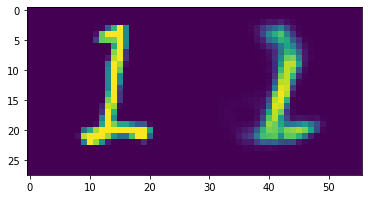

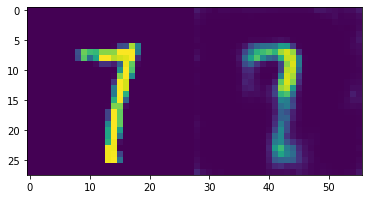

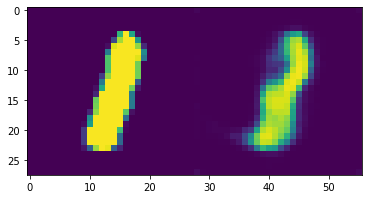

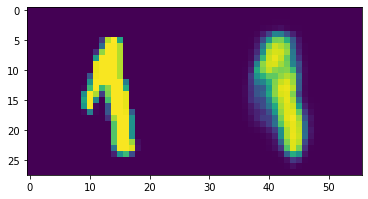

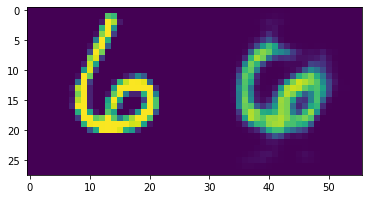

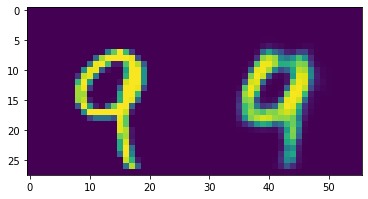

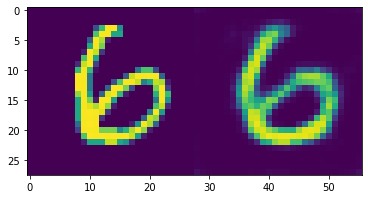

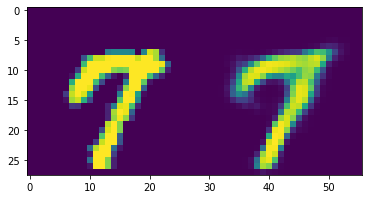

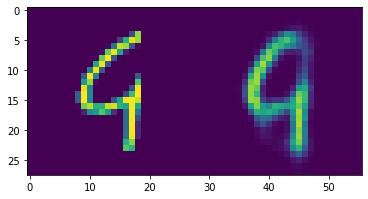

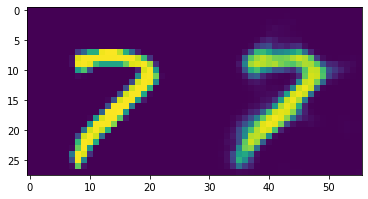

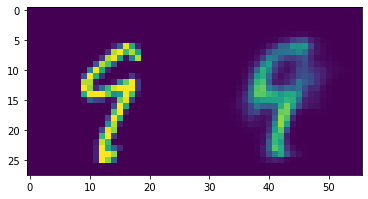

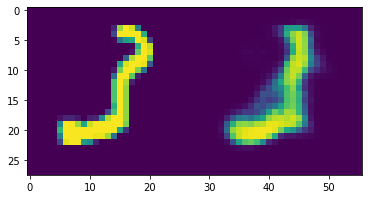

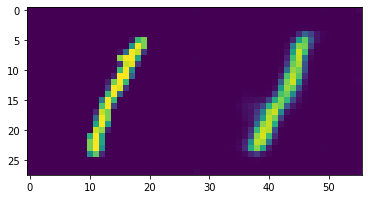

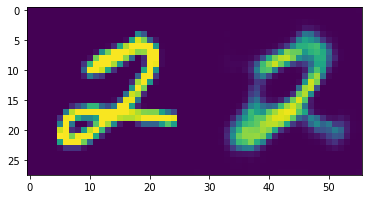

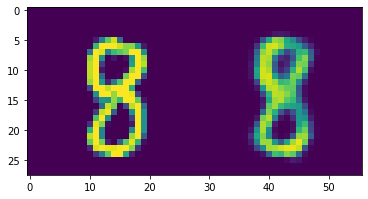

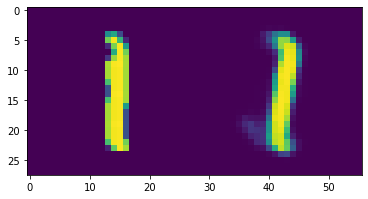

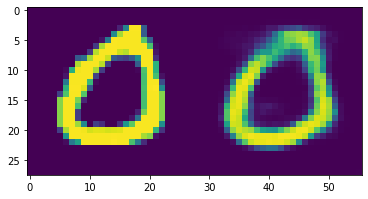

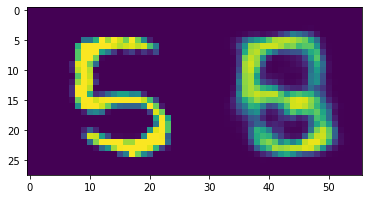

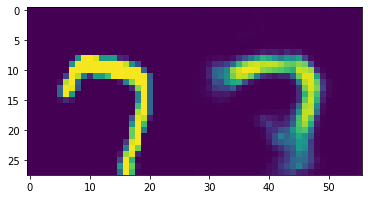

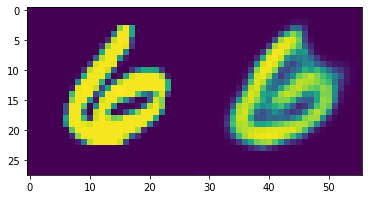

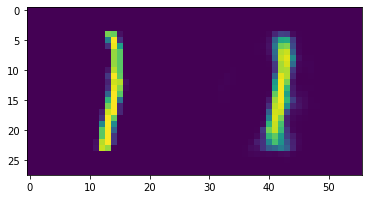

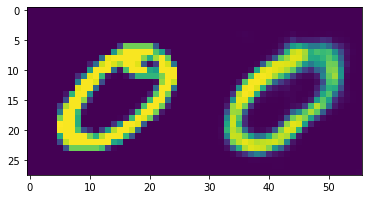

epoch : 2/3, loss = 16688.465883
start epoch 2


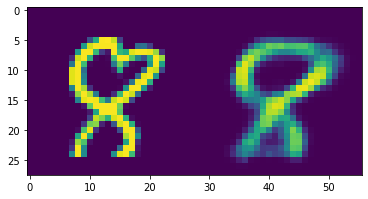

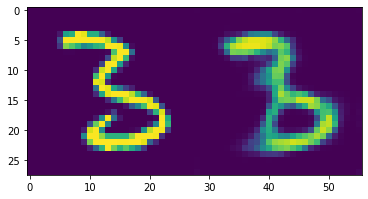

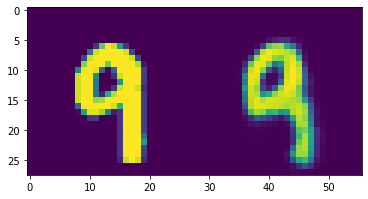

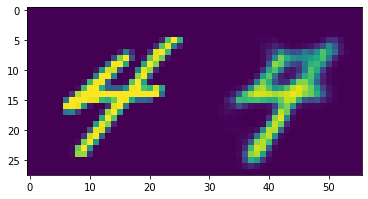

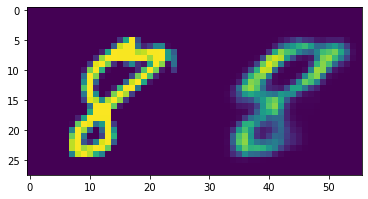

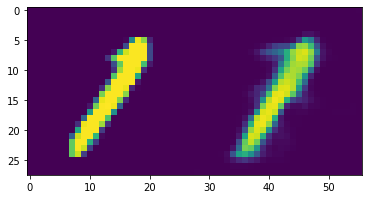

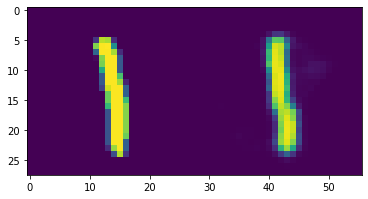

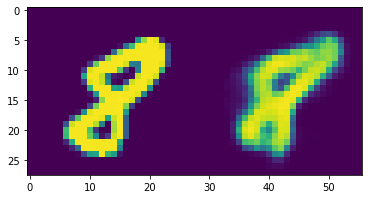

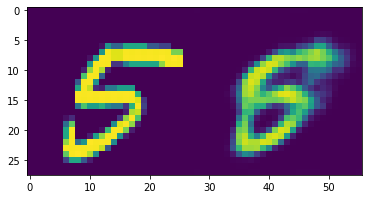

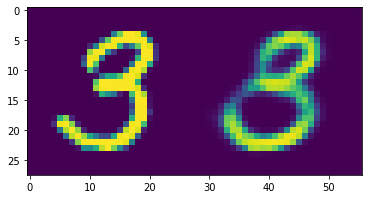

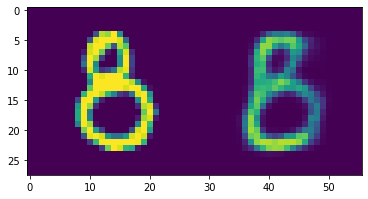

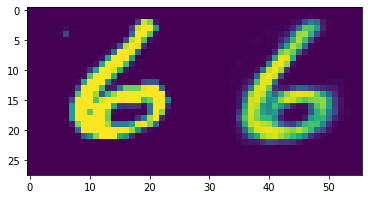

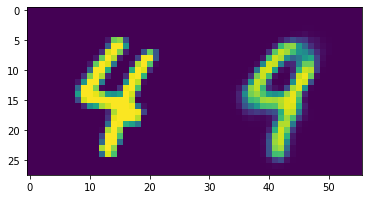

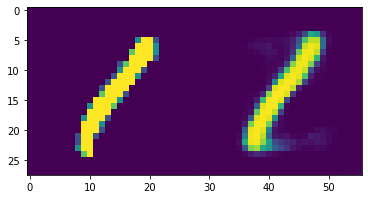

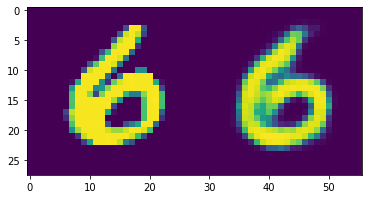

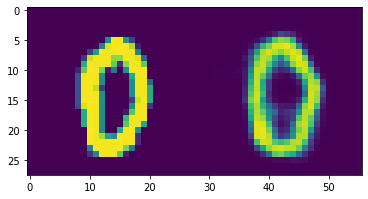

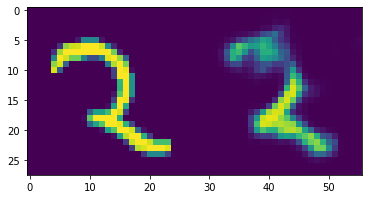

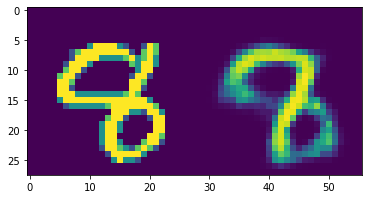

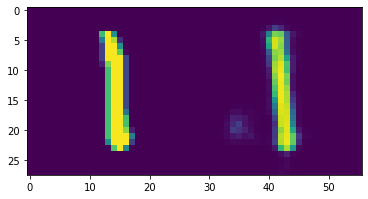

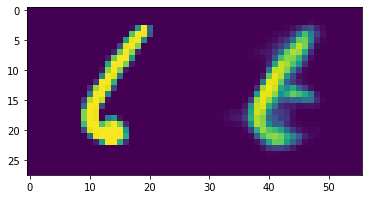

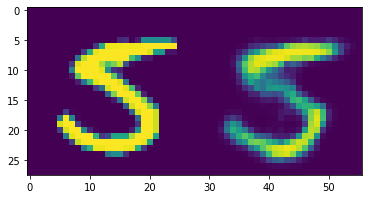

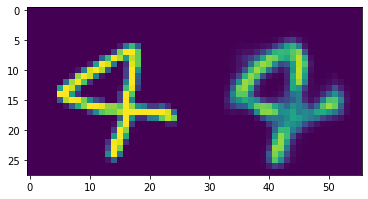

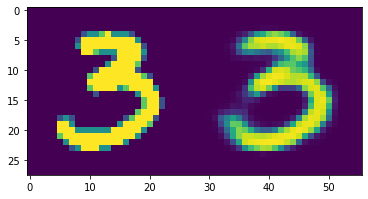

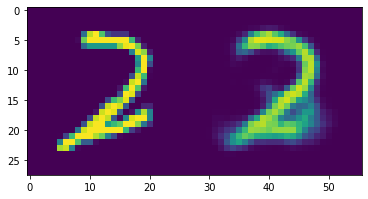

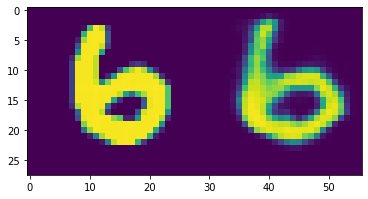

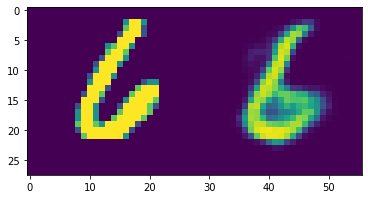

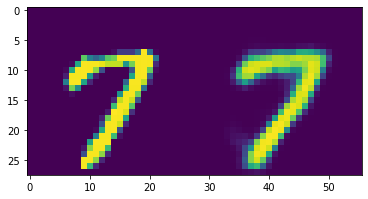

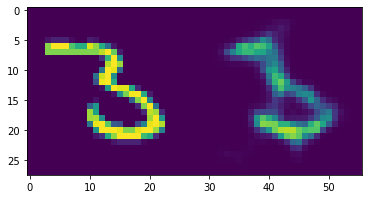

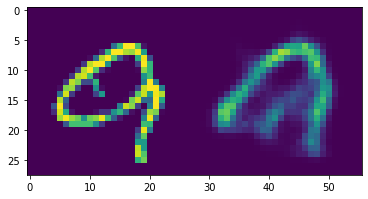

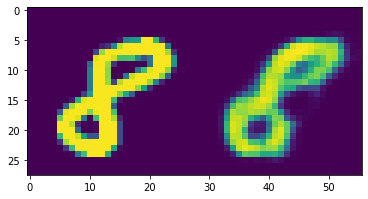

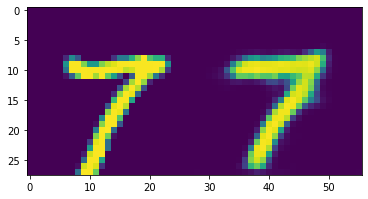

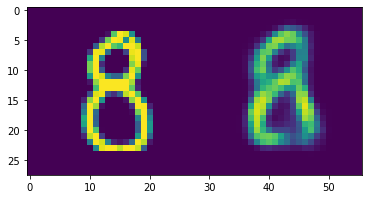

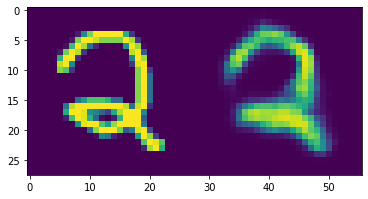

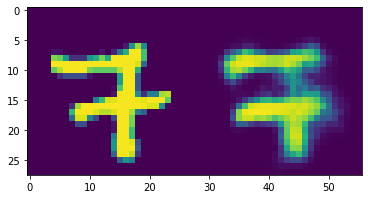

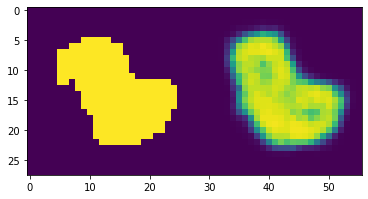

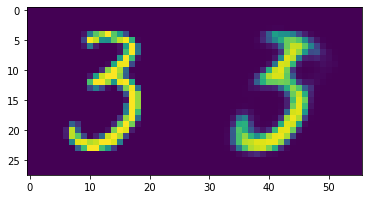

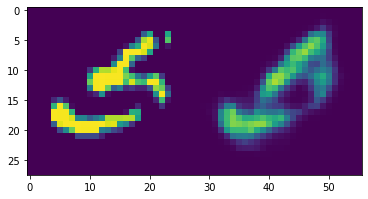

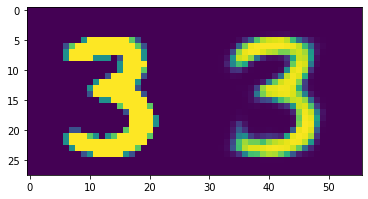

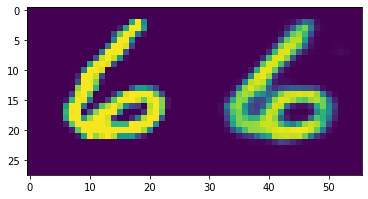

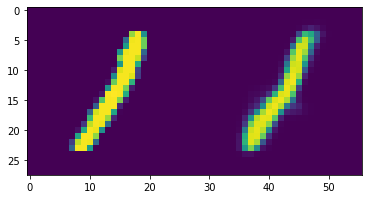

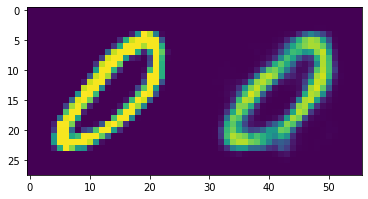

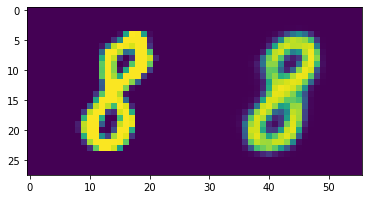

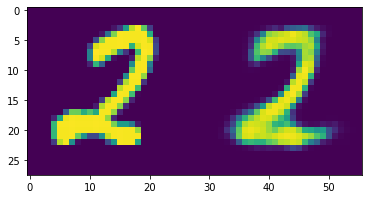

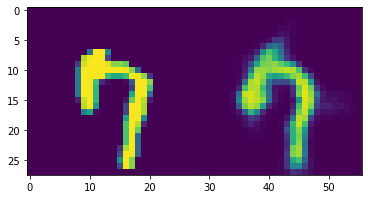

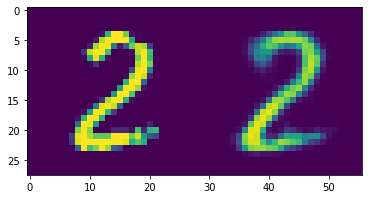

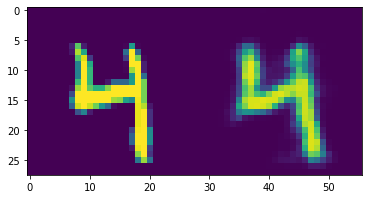

epoch : 3/3, loss = 16097.528324


In [14]:
epochs = 3
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE_model().to(device)
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# mean-squared error loss
criterion = nn.MSELoss()
model.train()
for epoch in range(epochs):
    loss = 0
    print("start epoch %d"%epoch)
    for i, (batch_features, _) in enumerate(train_loader):
        if i >0 and i %10 == 0:
          plt.figure()
          vis = np.concatenate((batch_features.detach().numpy()[0, 0, :, :], model(batch_features)[0].detach().numpy()[0, 0, :, :]), axis=1)
          plt.imshow(vis)
          plt.draw()
          plt.show()
        # load it to the active device
        batch_features = batch_features.to(device)
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        # compute reconstructions
        outputs, mu, logvar   = model(batch_features)
        # compute training reconstruction loss
        train_loss = loss_function(outputs, batch_features, mu, logvar)
        # compute accumulated gradients
        train_loss.backward()
        # perform parameter update based on current gradients
        optimizer.step()
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    # compute the epoch training loss
    loss = loss / len(train_loader)
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

## Reference
* https://arxiv.org/abs/1312.6114
* https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html
* https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf
* https://stats.stackexchange.com/questions/323568/help-understanding-reconstruction-loss-in-variational-autoencoder
* https://arxiv.org/pdf/1708.08487.pdf